In [61]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, plot_roc_curve, accuracy_score, recall_score, precision_score, silhouette_samples, silhouette_score
import requests
import warnings
import plotly.express as px
import plotly.graph_objects as go
import itertools
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering, KMeans, dbscan
from sklearn.mixture import GaussianMixture
import os
import pandas as pd


## Clustering

In [62]:
all_defence_clust = pd.read_csv('all_defence.csv')




all_defence_clust = all_defence_clust[(all_defence_clust['GP']>20)& (all_defence_clust['MIN']>15)&(all_defence_clust['Season']=='2021-22')]




In [63]:
all_defence_clust.columns

Index(['PLAYER_NAME', 'Season', 'DEF Handoff PPP', 'DEF Handoff FREQ', 'GP',
       'DEF Isolation PPP', 'DEF Isolation FREQ', 'DEF OffScreen PPP',
       'DEF OffScreen FREQ', 'DEF Postup PPP', 'DEF Postup FREQ',
       'DEF PRBallHandler PPP', 'DEF PRBallHandler FREQ', 'DEF PRRollman PPP',
       'DEF PRRollman FREQ', 'DEF Spotup PPP', 'DEF Spotup FREQ',
       'FREQ 3 Pointers', 'PLUSMINUS 3 Pointers', 'FREQ Less Than 6Ft',
       'PLUSMINUS Less Than 6Ft', 'FREQ Less Than 10Ft',
       'PLUSMINUS Less Than 10Ft', 'MIN', 'DEFLECTIONS',
       'PCT_LOOSE_BALLS_RECOVERED_DEF', 'REB_CONTEST_PCT', 'AVG_REB_DIST',
       'DIST_MILES_DEF', 'AVG_SPEED_DEF', 'DEFLECTIONS Per36'],
      dtype='object')

In [64]:
defence_percentiles = all_defence_clust.copy()




for i in all_defence_clust.columns[2:]:
   defence_percentiles[i + ' Rank'] = defence_percentiles[i].rank(pct=True)

defence_percentiles = defence_percentiles.drop(all_defence_clust.columns[2:], axis=1)
defence_percentiles.to_csv('def_percentiles.csv', index=False)

In [65]:
defence_percentiles

,PLAYER_NAME,Season,DEF Handoff PPP Rank,DEF Handoff FREQ Rank,GP Rank,DEF Isolation PPP Rank,DEF Isolation FREQ Rank,DEF OffScreen PPP Rank,DEF OffScreen FREQ Rank,DEF Postup PPP Rank,...,FREQ Less Than 10Ft Rank,PLUSMINUS Less Than 10Ft Rank,MIN Rank,DEFLECTIONS Rank,PCT_LOOSE_BALLS_RECOVERED_DEF Rank,REB_CONTEST_PCT Rank,AVG_REB_DIST Rank,DIST_MILES_DEF Rank,AVG_SPEED_DEF Rank,DEFLECTIONS Per36 Rank
1021,Robert Williams III,2021-22,0.158774,0.189415,0.504178,0.477716,0.938719,0.286908,0.260446,0.175487,...,0.071031,0.015320,0.711699,0.586351,0.452646,0.974930,0.218663,0.660167,0.356546,0.417827
1024,Josh Jackson,2021-22,0.161560,0.523677,0.194986,0.746518,0.454039,0.976323,0.926184,0.040390,...,0.610028,0.410864,0.077994,0.147632,0.800836,0.548747,0.363510,0.058496,0.501393,0.428969
1027,Ish Smith,2021-22,0.164345,0.940111,0.172702,0.175487,0.335655,0.096100,0.096100,1.000000,...,0.455432,0.817549,0.135097,0.316156,0.912256,0.194986,0.771588,0.101671,0.540390,0.655989
1028,Ish Smith,2021-22,0.465181,0.381616,0.098886,0.518106,0.236769,0.096100,0.096100,0.395543,...,0.455432,0.817549,0.135097,0.316156,0.912256,0.194986,0.771588,0.101671,0.540390,0.655989
1029,Naz Reid,2021-22,0.295265,0.194986,0.926184,0.817549,0.817549,0.096100,0.096100,0.763231,...,0.969359,0.075209,0.029248,0.222841,0.383008,0.942897,0.118384,0.069638,0.637883,0.632312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Kevon Looney,2021-22,0.079387,0.079387,0.994429,0.651811,0.788301,0.402507,0.233983,0.774373,...,0.554318,0.233983,0.324513,0.335655,0.305014,0.922006,0.135097,0.320334,0.568245,0.447075
1778,Alperen Sengun,2021-22,0.079387,0.079387,0.798050,0.622563,0.919220,0.445682,0.233983,0.665738,...,0.988858,0.660167,0.302228,0.671309,0.104457,0.933148,0.135097,0.270195,0.518106,0.846797
1779,Isaiah Stewart,2021-22,0.079387,0.079387,0.770195,0.449861,0.972145,0.920613,0.228412,0.320334,...,0.610028,0.026462,0.530641,0.058496,0.196379,0.855153,0.033426,0.509749,0.474930,0.022284
1793,D.J. Augustin,2021-22,0.079387,0.079387,0.144847,0.015320,0.015320,0.445682,0.909471,0.040390,...,0.860724,0.998607,0.048747,0.018106,0.513928,0.004178,0.998607,0.011142,0.229805,0.054318


In [66]:
def_train = all_defence_clust.drop(['PLAYER_NAME', 'Season', 'MIN', 'GP', 'DEFLECTIONS'], axis='columns')

In [67]:
def_train.columns

Index(['DEF Handoff PPP', 'DEF Handoff FREQ', 'DEF Isolation PPP',
       'DEF Isolation FREQ', 'DEF OffScreen PPP', 'DEF OffScreen FREQ',
       'DEF Postup PPP', 'DEF Postup FREQ', 'DEF PRBallHandler PPP',
       'DEF PRBallHandler FREQ', 'DEF PRRollman PPP', 'DEF PRRollman FREQ',
       'DEF Spotup PPP', 'DEF Spotup FREQ', 'FREQ 3 Pointers',
       'PLUSMINUS 3 Pointers', 'FREQ Less Than 6Ft', 'PLUSMINUS Less Than 6Ft',
       'FREQ Less Than 10Ft', 'PLUSMINUS Less Than 10Ft',
       'PCT_LOOSE_BALLS_RECOVERED_DEF', 'REB_CONTEST_PCT', 'AVG_REB_DIST',
       'DIST_MILES_DEF', 'AVG_SPEED_DEF', 'DEFLECTIONS Per36'],
      dtype='object')

In [68]:
pd.DataFrame(def_train.mean()).transpose().to_csv('Defence League Average.csv', index=False)

In [69]:
norm_train = pd.DataFrame(StandardScaler().fit_transform(def_train),columns = def_train.columns)

## Try K-Means

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have

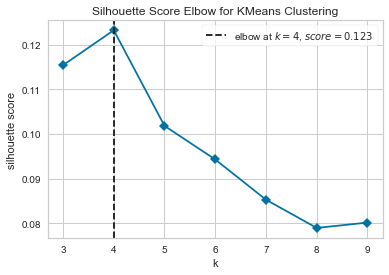

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [70]:
kmean = KMeans(random_state=1)
visualizer = KElbowVisualizer(kmean, 
                              k=(3,10),   
                              locate_elbow=True, # Locate the elbow? Default is true.
                              timings=False, # Plot the timings to train?
                              metric = 'silhouette'
                             )   

visualizer.fit(norm_train)        
visualizer.show()   

## Try GMM

In [71]:
def gauss_tune(data,min_clust, max_clust, seed=29):
    
    cluster_amounts = np.arange(min_clust, max_clust+1)
    bics = []
    clust_num = np.arange(1,len(cluster_amounts)-1)
    
    for i in cluster_amounts:
        gmm = GaussianMixture(i, random_state=seed)
        gmm.fit(data)
        bic = gmm.bic(data)
        bics.append(bic)
    plt.plot(cluster_amounts, bics, 'k-o')
    plt.xticks(np.arange(3,21))
    plt.show()
    
    


c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have

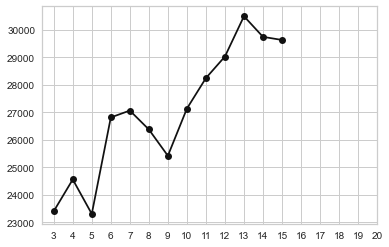

In [72]:

gauss_tune(norm_train, 3,15)

In [73]:
cluster_results = def_train.copy()
gmm = GaussianMixture(5, random_state=29)
kmeans5 = KMeans(5, random_state=2022)
clusters = gmm.fit_predict(norm_train)
cluster_results['Clusters'] = clusters

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [74]:

cluster_groups = cluster_results.groupby(clusters).mean()
cluster_groups.to_html('Cluster Data.html')

In [75]:
cluster_groups

,DEF Handoff PPP,DEF Handoff FREQ,DEF Isolation PPP,DEF Isolation FREQ,DEF OffScreen PPP,DEF OffScreen FREQ,DEF Postup PPP,DEF Postup FREQ,DEF PRBallHandler PPP,DEF PRBallHandler FREQ,...,PLUSMINUS Less Than 6Ft,FREQ Less Than 10Ft,PLUSMINUS Less Than 10Ft,PCT_LOOSE_BALLS_RECOVERED_DEF,REB_CONTEST_PCT,AVG_REB_DIST,DIST_MILES_DEF,AVG_SPEED_DEF,DEFLECTIONS Per36,Clusters
0,0.908192,0.085840,0.902840,0.074006,0.930936,0.065692,0.940083,0.049705,0.873737,0.304981,...,0.007026,0.442590,0.007891,0.528885,0.228141,8.321154,0.948333,3.856090,2.207427,0.0
1,0.231441,0.004941,0.958706,0.104176,0.492647,0.007941,0.960294,0.064441,0.592824,0.018912,...,-0.050412,0.516029,-0.040029,0.413059,0.445147,4.976471,0.810588,3.827647,2.008165,1.0
2,0.823816,0.078342,0.819592,0.068224,0.741579,0.055632,0.703447,0.043921,0.893329,0.297921,...,0.010053,0.459934,0.012105,0.528697,0.233658,8.426316,0.775526,3.873816,2.315977,2.0
3,0.049393,0.001250,0.947929,0.075964,0.024714,0.000500,0.883321,0.055536,0.000000,0.000714,...,-0.036107,0.486250,-0.027429,0.384893,0.461786,4.810714,0.652143,3.831786,1.780798,3.0
4,0.939969,0.046154,0.894200,0.114615,0.886200,0.040369,0.956262,0.058446,0.874154,0.124985,...,-0.042323,0.470708,-0.036215,0.495692,0.350846,5.772308,0.856308,3.831846,1.844435,4.0


In [76]:
def_ranks = pd.DataFrame()
for i in cluster_groups.columns:
    def_ranks[i + ' rank'] = cluster_groups[i].rank()

def_ranks.to_csv('def_ranks.csv', index=False)

In [77]:
player_groups  = all_defence_clust[['PLAYER_NAME', 'Season']].copy()
player_groups['Cluster'] = clusters
player_groups_2021 = player_groups[player_groups['Season']=='2021-22']
player_groups.Cluster.value_counts()

0    156
2     76
4     65
1     34
3     28
Name: Cluster, dtype: int64

In [78]:
all_defence_clust['Cluster'] = clusters

In [79]:
player_groups[player_groups['PLAYER_NAME']=='Naz Reid']

,PLAYER_NAME,Season,Cluster
1029,Naz Reid,2021-22,1


In [80]:
player_groups[player_groups['Cluster']==3]

,PLAYER_NAME,Season,Cluster
1032,Daniel Gafford,2021-22,3
1037,Onyeka Okongwu,2021-22,3
1141,Jalen Smith,2021-22,3
1682,Olivier Sarr,2021-22,3
1693,Derrick Favors,2021-22,3
1699,Robin Lopez,2021-22,3
1706,Alex Len,2021-22,3
1712,Dewayne Dedmon,2021-22,3
1717,Thomas Bryant,2021-22,3
1722,Tristan Thompson,2021-22,3


## Analyze the Large Cluster 0

In [81]:
full_results = all_defence_clust.copy()
full_results['Cluster'] = clusters

In [82]:
full_results.Cluster.value_counts()

0    156
2     76
4     65
1     34
3     28
Name: Cluster, dtype: int64

In [83]:
clust_0 =  cluster_results[cluster_results['Clusters']==0].copy().drop('Clusters', axis='columns')
player_0 = player_groups[player_groups['Cluster']==0].copy()

In [84]:
pc2 = PCA(2)
clust0_pc = pd.DataFrame(pc2.fit_transform(clust_0), columns = ['Component 1', 'Component 2'])


In [85]:


print(f'Variance Explained by these two components is: {pc2.explained_variance_ratio_.sum()}')
np.transpose(pd.DataFrame(pc2.components_, columns= clust_0.columns, index = ['Component 1', 'Component 2'])).sort_values('Component 1')

Variance Explained by these two components is: 0.8627347460298093


,Component 1,Component 2
AVG_REB_DIST,-0.998018,0.005509
DEF PRBallHandler FREQ,-0.020605,0.028112
PCT_LOOSE_BALLS_RECOVERED_DEF,-0.010973,0.034416
PLUSMINUS Less Than 6Ft,-0.007949,-0.000542
PLUSMINUS Less Than 10Ft,-0.005377,-0.000604
FREQ 3 Pointers,-0.004166,-0.002764
DEF Handoff PPP,-0.001791,-0.017722
DEF Handoff FREQ,-0.001122,-0.001950
DEF PRRollman FREQ,-0.000791,-0.000995
DEF Postup FREQ,0.001092,0.000746


In [86]:
np.transpose(pd.DataFrame(pc2.components_, columns= clust_0.columns, index = ['Component 1', 'Component 2'])).sort_values('Component 2')

,Component 1,Component 2
DIST_MILES_DEF,0.014580,-0.037984
DEF OffScreen PPP,0.005573,-0.036072
DEF Isolation PPP,0.014463,-0.025062
DEF Spotup PPP,0.010614,-0.022065
DEF Handoff PPP,-0.001791,-0.017722
DEF PRBallHandler PPP,0.001198,-0.013271
DEF Spotup FREQ,0.008465,-0.011560
PLUSMINUS 3 Pointers,0.002952,-0.005713
DEF Isolation FREQ,0.004779,-0.005006
FREQ 3 Pointers,-0.004166,-0.002764


In [87]:
fig = go.Figure()
fig.add_scatter(x = clust0_pc['Component 1'], y = clust0_pc['Component 2'], name = 'Cluster 0', mode = 'markers', marker = dict(color = 'black' ), hoverinfo = 'skip', customdata=player_0.PLAYER_NAME, hovertemplate = 'Player: %{customdata}<br><extra></extra>' )


In [88]:
def sub_cluster(df, component, cutoff):
    df['SubGroup'] = [0]*len(df)

    df.loc[df[component]>cutoff, 'Subgroup'] = 0

    df.loc[df[component]<cutoff, 'Subgroup'] = 1
    





    

In [89]:
clust0_pc[clust0_pc['Component 2']<0]

,Component 1,Component 2
4,1.215154,-0.185107
6,0.242600,-0.361102
7,0.109870,-0.331188
8,0.237903,-0.870385
9,-2.187623,-0.287797
...,...,...
150,1.525525,-0.314893
151,-2.596714,-0.476173
153,-1.094951,-0.830183
154,0.323809,-0.533677


In [90]:
sub_cluster(clust0_pc, 'Component 2', 0)

In [91]:
sub_clust0 = clust0_pc.Subgroup.values

In [92]:
sub_clust0

array([0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1.])

In [93]:
player_0['Subgroup'] = sub_clust0
clust_0['Subgroup'] = sub_clust0

In [94]:
player_0[player_0['PLAYER_NAME']=='Gary Trent Jr.']

,PLAYER_NAME,Season,Cluster,Subgroup
1340,Gary Trent Jr.,2021-22,0,0.0


In [95]:
sum(player_0['Subgroup']==1)

94

## Analyze Cluster 4

In [96]:
def pca_clust(data, players):
    pc2 = PCA(2)
    cluster_pca = pd.DataFrame(pc2.fit_transform(data), columns = ['Component 1', 'Component 2'])
    
    print(f'Variance Explained by these two components is: {pc2.explained_variance_ratio_.sum()}')
    comps = np.transpose(pd.DataFrame(pc2.components_, columns= data.columns, index = ['Component 1', 'Component 2']))
    fig = go.Figure()
    fig.add_scatter(x = cluster_pca['Component 1'], y = cluster_pca['Component 2'], name = 'Cluster 0', mode = 'markers', marker = dict(color = 'black' ), hoverinfo = 'skip', customdata=players.PLAYER_NAME, hovertemplate = 'Player: %{customdata}<br><extra></extra>' )
    fig.show()
    return(comps, cluster_pca)

In [97]:
clust_4 =  cluster_results[cluster_results['Clusters']==4].copy().drop('Clusters', axis='columns')
player_4 = player_groups[player_groups['Cluster']==4].copy()

In [98]:
comps, cluster_4_pca = pca_clust(clust_4, player_4)
comps.sort_values('Component 2')

Variance Explained by these two components is: 0.6876697074732836


,Component 1,Component 2
AVG_REB_DIST,0.980411,-0.121028
DEF OffScreen PPP,0.096085,-0.060506
DEF Handoff PPP,-0.032713,-0.055563
AVG_SPEED_DEF,0.011503,-0.019693
DEF Isolation FREQ,0.003006,-0.010233
PLUSMINUS Less Than 6Ft,0.007732,-0.004811
PLUSMINUS Less Than 10Ft,0.006617,-0.002486
DEF Handoff FREQ,0.009758,-0.002395
DEF OffScreen FREQ,0.012666,-0.001444
DEF Postup FREQ,0.001546,-0.000542


In [99]:
sub_cluster(cluster_4_pca, 'Component 1', -0.15)

In [100]:
sub_clust4 = cluster_4_pca.Subgroup.values
player_4['Subgroup'] = sub_clust4
clust_4['Subgroup'] = sub_clust4

In [101]:
all_defence_clust.PLAYER_NAME.isin(player_4.PLAYER_NAME)

1021     True
1024    False
1027    False
1028    False
1029    False
        ...  
1777    False
1778    False
1779    False
1793    False
1794    False
Name: PLAYER_NAME, Length: 359, dtype: bool

### Reassign cluster values

In [102]:
def new_clust(df, player_data, new_cluster, sub_cluster=0):
    
    player_list = player_data[player_data['Subgroup']== sub_cluster]['PLAYER_NAME'].values

    df.loc[df.PLAYER_NAME.isin(player_list), 'Cluster'] = new_cluster
    
    df_new = df.copy()
    return df
    

In [103]:
all_defence_clust = new_clust(all_defence_clust, player_0, 5)

In [104]:
all_defence_clust = new_clust(all_defence_clust, player_4, 6)

In [105]:
all_defence_clust['Cluster'] = all_defence_clust['Cluster'].replace(3,1)
all_defence_clust.Cluster.value_counts()

0    94
2    72
5    65
1    62
6    40
4    26
Name: Cluster, dtype: int64

In [106]:
all_defence_clust[all_defence_clust['PLAYER_NAME']=='Andre Drummond']

,PLAYER_NAME,Season,DEF Handoff PPP,DEF Handoff FREQ,GP,DEF Isolation PPP,DEF Isolation FREQ,DEF OffScreen PPP,DEF OffScreen FREQ,DEF Postup PPP,...,PLUSMINUS Less Than 10Ft,MIN,DEFLECTIONS,PCT_LOOSE_BALLS_RECOVERED_DEF,REB_CONTEST_PCT,AVG_REB_DIST,DIST_MILES_DEF,AVG_SPEED_DEF,DEFLECTIONS Per36,Cluster
1738,Andre Drummond,2021-22,0.0,0.0,49,1.038,0.052,0.0,0.0,1.25,...,-0.022,19.7,2.14,0.375,0.501,3.9,0.65,3.84,3.91066,1
1739,Andre Drummond,2021-22,0.0,0.0,24,1.250,0.114,0.0,0.0,1.00,...,-0.022,19.7,2.14,0.375,0.501,3.9,0.65,3.84,3.91066,1


## Export Data

In [108]:
defence_cluster = all_defence_clust.drop(['PLAYER_NAME', 'Season', 'MIN', 'GP', 'DEFLECTIONS'], axis='columns')
defence_cluster_groups = defence_cluster.groupby('Cluster').mean()
defence_cluster_groups['Cluster'] = (0,1,2,4,5,6)
defence_cluster_groups.to_csv('Defence Cluster Data.csv', index = False)

In [109]:
defence_cluster_groups

,DEF Handoff PPP,DEF Handoff FREQ,DEF Isolation PPP,DEF Isolation FREQ,DEF OffScreen PPP,DEF OffScreen FREQ,DEF Postup PPP,DEF Postup FREQ,DEF PRBallHandler PPP,DEF PRBallHandler FREQ,...,PLUSMINUS Less Than 6Ft,FREQ Less Than 10Ft,PLUSMINUS Less Than 10Ft,PCT_LOOSE_BALLS_RECOVERED_DEF,REB_CONTEST_PCT,AVG_REB_DIST,DIST_MILES_DEF,AVG_SPEED_DEF,DEFLECTIONS Per36,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.925000,0.087223,0.903862,0.076394,0.959787,0.065936,0.924149,0.048734,0.875138,0.292043,...,0.002830,0.442574,0.004266,0.510489,0.221787,8.309574,0.978511,3.830638,1.651185,0
1,0.149226,0.003274,0.953839,0.091435,0.281323,0.004581,0.925532,0.060419,0.325097,0.010694,...,-0.043952,0.502581,-0.034339,0.400339,0.452661,4.901613,0.739032,3.829516,1.905483,1
2,0.827514,0.078542,0.832347,0.068333,0.752583,0.056306,0.701083,0.043000,0.897889,0.297639,...,0.009833,0.459694,0.012097,0.523639,0.235931,8.397222,0.768194,3.874722,2.274556,2
4,0.943654,0.037731,0.923962,0.111731,0.729846,0.027923,0.917846,0.057692,0.875231,0.078577,...,-0.053423,0.467885,-0.043769,0.475923,0.383038,4.930769,0.879231,3.843462,1.719314,4
5,0.874585,0.083569,0.883908,0.070062,0.862908,0.064077,0.944108,0.050892,0.871323,0.325215,...,0.014123,0.443369,0.014185,0.559431,0.234369,8.410769,0.903077,3.896308,3.034862,5
6,0.936800,0.051950,0.872150,0.115500,0.992950,0.048925,0.992325,0.060150,0.867825,0.156975,...,-0.034850,0.472775,-0.031475,0.512050,0.328125,6.327500,0.842250,3.819500,1.982840,6


In [110]:

def_ranks = pd.DataFrame()
for i in defence_cluster_groups.columns:
    def_ranks[i + ' rank'] = defence_cluster_groups[i].rank()

def_ranks.to_html('def_ranks.html')


In [111]:
all_defence_clust[all_defence_clust['Cluster']==1].PLAYER_NAME.values

array(['Naz Reid', 'Steven Adams', 'Daniel Gafford', 'Onyeka Okongwu',
       'Dwight Powell', 'Isaiah Hartenstein', 'Mitchell Robinson',
       'Jakob Poeltl', 'Kelly Olynyk', 'Nemanja Bjelica',
       'Jonas Valanciunas', 'Domantas Sabonis', 'Jalen Smith',
       'Olivier Sarr', 'Derrick Favors', 'Robin Lopez', 'Alex Len',
       'Nerlens Noel', 'Dewayne Dedmon', 'Thomas Bryant',
       'Kristaps Porzingis', 'Tristan Thompson', 'Tristan Thompson',
       'Zach Collins', 'Serge Ibaka', 'JaVale McGee', 'Andre Drummond',
       'Andre Drummond', 'Montrezl Harrell', 'Montrezl Harrell',
       'Taj Gibson', 'Trey Lyles', 'Isaiah Roby', 'Daniel Theis',
       'Daniel Theis', 'Drew Eubanks', 'Drew Eubanks',
       'Willy Hernangomez', 'Jusuf Nurkic', 'Joel Embiid',
       'Hassan Whiteside', 'Richaun Holmes', 'Khem Birch',
       'Jeremiah Robinson-Earl', 'Dwight Howard', 'Blake Griffin',
       'Mason Plumlee', 'Myles Turner', 'Clint Capela', 'Trendon Watford',
       'Deandre Ayton', 'LaM

In [112]:
def_cluster_dict = {0: ' Positional Perimeter Guard', 1: 'Paint Protector', 2:'Off-Ball Chaser',  4: 'Versatile Rim Protector', 5: 'Perimeter Ball-Hawk', 6: 'Versatile Positional Wing'}



In [113]:
def_cluster = all_defence_clust.drop(['Season', 'MIN', 'GP', 'DEFLECTIONS'], axis=1)

In [114]:
def_cluster['Archetype'] = def_cluster['Cluster'].map(def_cluster_dict)

In [115]:
def_cluster.to_csv("Defence Data.csv", index = False)

In [142]:
def_cluster[def_cluster['PLAYER_NAME']=='Andre Drummond']

,PLAYER_NAME,DEF Handoff PPP,DEF Handoff FREQ,DEF Isolation PPP,DEF Isolation FREQ,DEF OffScreen PPP,DEF OffScreen FREQ,DEF Postup PPP,DEF Postup FREQ,DEF PRBallHandler PPP,...,FREQ Less Than 10Ft,PLUSMINUS Less Than 10Ft,PCT_LOOSE_BALLS_RECOVERED_DEF,REB_CONTEST_PCT,AVG_REB_DIST,DIST_MILES_DEF,AVG_SPEED_DEF,DEFLECTIONS Per36,Cluster,Archetype
1738,Andre Drummond,0.0,0.0,1.038,0.052,0.0,0.0,1.25,0.024,0.0,...,0.494,-0.022,0.375,0.501,3.9,0.65,3.84,3.91066,1,Paint Protector
1739,Andre Drummond,0.0,0.0,1.250,0.114,0.0,0.0,1.00,0.036,0.0,...,0.494,-0.022,0.375,0.501,3.9,0.65,3.84,3.91066,1,Paint Protector


## Offence Clustering

In [116]:
all_offence_clust = pd.read_csv('all_offence.csv')

all_offence_clust = all_offence_clust[(all_offence_clust['GP']>20)& (all_offence_clust['MIN']>15)]

In [117]:
all_offence_clust.columns

Index(['PLAYER_NAME', 'Season', 'Cut PPP', 'Cut FREQ', 'GP', 'Handoff PPP',
       'Handoff FREQ', 'Isolation PPP', 'Isolation FREQ', 'Misc PPP',
       'Misc FREQ', 'OffScreen PPP', 'OffScreen FREQ', 'Postup PPP',
       'Postup FREQ', 'PRBallHandler PPP', 'PRBallHandler FREQ',
       'PRRollman PPP', 'PRRollman FREQ', 'OffRebound PPP', 'OffRebound FREQ',
       'Spotup PPP', 'Spotup FREQ', 'Transition PPP', 'Transition FREQ',
       'Total Poss', 'MIN', 'POTENTIAL_AST', 'DRIVE_PASSES_PCT',
       'PULL_UP_FG3_PCT', 'CATCH_SHOOT_FG_PCT', 'FG3A', 'USG_PCT',
       'POTENTIAL_AST FREQ', 'Restricted Area FREQ',
       'In The Paint (Non-RA) FREQ', 'Mid-Range FREQ', '3P FREQ',
       'Drives FREQ', 'PULL_UP FREQ', 'CATCH_SHOOT FREQ'],
      dtype='object')

In [118]:
offence_percentiles = all_offence_clust.copy()




for i in all_offence_clust.columns[2:]:
   offence_percentiles[i + ' Rank'] = offence_percentiles[i].rank(pct=True)

offence_percentiles = offence_percentiles.drop(all_offence_clust.columns[2:], axis=1)
offence_percentiles.to_csv('off_percentiles.csv', index=False)

In [119]:
off_train = all_offence_clust.drop(['PLAYER_NAME', 'Season', 'GP', 'MIN', 'Misc PPP', 'Misc FREQ', "Total Poss", 'POTENTIAL_AST','PULL_UP_FG3_PCT', 'CATCH_SHOOT_FG_PCT' ], axis='columns')

In [120]:
pd.DataFrame(off_train.mean()).transpose().to_csv('Offence League Average.csv', index=False)

In [121]:
(off_train['Mid-Range FREQ'].values>1).sum()

0

In [122]:
norm_off_train = pd.DataFrame(StandardScaler().fit_transform(off_train),columns = off_train.columns)

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have

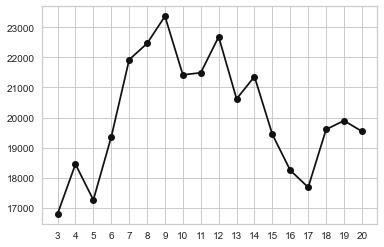

In [123]:
gauss_tune(norm_off_train, 3,20)

In [124]:
off_cluster_results = off_train.copy()
gmm = GaussianMixture(17, random_state=29)
off_clusters = gmm.fit_predict(norm_off_train)
off_cluster_results['Clusters'] = off_clusters

c:\Users\rpand\anaconda3\envs\nba_app_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [125]:
off_cluster_results

,Cut PPP,Cut FREQ,Handoff PPP,Handoff FREQ,Isolation PPP,Isolation FREQ,OffScreen PPP,OffScreen FREQ,Postup PPP,Postup FREQ,...,USG_PCT,POTENTIAL_AST FREQ,Restricted Area FREQ,In The Paint (Non-RA) FREQ,Mid-Range FREQ,3P FREQ,Drives FREQ,PULL_UP FREQ,CATCH_SHOOT FREQ,Clusters
0,1.342,0.298,0.000,0.000,1.263,0.025,0.0,0.0,1.056,0.143,...,0.177,0.248120,0.705263,0.242105,0.052632,0.020619,0.082707,0.010309,0.072165,10
1,1.357,0.249,0.000,0.000,0.000,0.000,0.0,0.0,1.061,0.059,...,0.166,0.138211,0.881579,0.118421,0.000000,0.012987,0.024390,0.012987,0.012987,4
2,1.528,0.380,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,...,0.112,0.454545,0.852459,0.114754,0.032787,0.000000,0.012987,0.000000,0.016667,4
3,1.274,0.194,0.000,0.000,0.909,0.103,0.0,0.0,0.967,0.141,...,0.201,0.344156,0.457944,0.355140,0.186916,0.108333,0.227273,0.175000,0.158333,1
4,1.283,0.265,0.000,0.000,0.000,0.000,0.0,0.0,0.818,0.030,...,0.149,0.218750,0.817073,0.170732,0.012195,0.000000,0.020833,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0.000,0.000,0.364,0.048,0.333,0.053,0.0,0.0,0.000,0.000,...,0.174,0.621212,0.382353,0.176471,0.441176,0.474576,0.515152,0.423729,0.338983,11
411,0.000,0.000,0.000,0.000,0.875,0.107,0.0,0.0,0.000,0.000,...,0.152,1.268657,0.565217,0.304348,0.130435,0.511111,0.761194,0.266667,0.311111,5
415,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,...,0.146,0.351852,0.631579,0.210526,0.157895,0.595745,0.407407,0.170213,0.489362,14
435,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,...,0.150,0.340426,0.787879,0.121212,0.090909,0.346939,0.489362,0.102041,0.285714,2


In [126]:
off_cluster_results['Clusters'] = off_cluster_results['Clusters'].replace([10,16], [4,1])
off_cluster_results.Clusters.value_counts()

4     37
1     32
3     32
9     30
11    27
0     26
14    24
6     21
2     18
15    18
8     18
7     16
12    15
13    14
5      7
Name: Clusters, dtype: int64

In [127]:

off_cluster_groups = off_cluster_results.groupby('Clusters').mean()
off_cluster_groups['Clusters'] = (0,1,2,3,4,5,6,7,8,9,11,12,13,14,15)
off_cluster_groups.to_csv("Offence Cluster Data.csv")
off_player_groups  = all_offence_clust[['PLAYER_NAME', 'Season']].copy()
off_player_groups['Cluster'] = off_cluster_results.Clusters
off_player_groups.Cluster.value_counts()

4     37
1     32
3     32
9     30
11    27
0     26
14    24
6     21
2     18
15    18
8     18
7     16
12    15
13    14
5      7
Name: Cluster, dtype: int64

In [128]:
pd.read_csv('Offence Cluster Data.csv')

,Clusters,Cut PPP,Cut FREQ,Handoff PPP,Handoff FREQ,Isolation PPP,Isolation FREQ,OffScreen PPP,OffScreen FREQ,Postup PPP,...,USG_PCT,POTENTIAL_AST FREQ,Restricted Area FREQ,In The Paint (Non-RA) FREQ,Mid-Range FREQ,3P FREQ,Drives FREQ,PULL_UP FREQ,CATCH_SHOOT FREQ,Clusters.1
0,0,1.183577,0.031462,0.910769,0.099423,0.861192,0.056154,0.969115,0.083154,0.026923,...,0.210731,0.374927,0.407665,0.272326,0.320009,0.519376,0.403745,0.363344,0.348195,0
1,1,1.308031,0.117656,0.396969,0.012406,0.726875,0.042469,0.495156,0.016969,0.942531,...,0.208344,0.321070,0.511666,0.320554,0.167781,0.284462,0.220376,0.112823,0.320523,1
2,2,1.208222,0.153667,0.206333,0.008389,0.233722,0.010944,0.000000,0.000000,0.174778,...,0.145889,0.314781,0.761026,0.177500,0.061474,0.359437,0.251103,0.055778,0.350507,2
3,3,1.327937,0.058031,0.849906,0.055531,0.876781,0.049875,0.881219,0.030469,0.272062,...,0.183812,0.406264,0.542517,0.317844,0.139640,0.420479,0.480686,0.195139,0.335122,3
4,4,1.305135,0.248405,0.033270,0.000649,0.193459,0.006541,0.000000,0.000000,0.753649,...,0.157757,0.315773,0.692092,0.256929,0.050979,0.049392,0.073780,0.031528,0.101502,4
5,5,0.906714,0.044000,0.383000,0.024571,0.514286,0.066429,0.000000,0.000000,0.000000,...,0.158714,1.251645,0.485207,0.302344,0.212449,0.280267,1.127054,0.312704,0.183101,5
6,6,1.252000,0.063905,0.837857,0.063524,0.034381,0.001286,0.998571,0.059667,0.034905,...,0.151095,0.327365,0.487996,0.261587,0.250417,0.602519,0.278453,0.177041,0.547792,6
7,7,1.362000,0.048125,0.925063,0.045000,0.787438,0.082000,0.801500,0.050500,0.983125,...,0.209563,0.274463,0.368518,0.306275,0.325207,0.431991,0.334799,0.282498,0.383558,7
8,8,0.717889,0.026667,0.977111,0.132333,0.179056,0.008500,0.965222,0.147722,0.049389,...,0.178833,0.305490,0.457135,0.263057,0.279808,0.717009,0.247812,0.255062,0.563775,8
9,9,1.088167,0.019033,0.916267,0.059567,0.918133,0.141600,0.936067,0.035900,0.346667,...,0.276067,0.537241,0.379052,0.349169,0.271779,0.393658,0.643719,0.451757,0.172106,9


In [129]:
off_player_groups[off_player_groups['PLAYER_NAME']=='Pascal Siakam']

,PLAYER_NAME,Season,Cluster
69,Pascal Siakam,2021-22,13


In [130]:
off_player_groups[off_player_groups['Cluster']==11]

,PLAYER_NAME,Season,Cluster
327,Tyrese Maxey,2021-22,11
346,Ricky Rubio,2021-22,11
348,Jalen Brunson,2021-22,11
350,Seth Curry,2021-22,11
352,Mike Conley,2021-22,11
353,Immanuel Quickley,2021-22,11
355,Malcolm Brogdon,2021-22,11
357,Davion Mitchell,2021-22,11
358,Cam Thomas,2021-22,11
362,Chris Paul,2021-22,11


In [131]:
off_ranks = pd.DataFrame()
for i in off_cluster_groups.columns:
    off_ranks[i + ' rank'] = off_cluster_groups[i].rank()

off_ranks.to_csv('off_ranks.csv', index=False)

In [132]:
off_cluster_dict = {0: 'Off-Guard Shot-Creator', 1: 'Versatile Big Creator', 2: 'Off-Ball Big', 3:'Versatile Wing Slasher', 4: 'Interior Big', 5:'Pass-First Hesitant-Shooter', 
6:'Spot-Up Shooter', 7: 'Big-Wing Secondary Creator', 8:'Movement Shooter',
9: 'Aggressive Guard', 11: ' Secondary Perimeter Shot Creator', 12: "Stretch Big",
 13: 'Iso-Wing Creator', 14:'Glue Guy', 15: 'Pass-First Willing Shooter'}



In [133]:
all_offence_clust.columns

Index(['PLAYER_NAME', 'Season', 'Cut PPP', 'Cut FREQ', 'GP', 'Handoff PPP',
       'Handoff FREQ', 'Isolation PPP', 'Isolation FREQ', 'Misc PPP',
       'Misc FREQ', 'OffScreen PPP', 'OffScreen FREQ', 'Postup PPP',
       'Postup FREQ', 'PRBallHandler PPP', 'PRBallHandler FREQ',
       'PRRollman PPP', 'PRRollman FREQ', 'OffRebound PPP', 'OffRebound FREQ',
       'Spotup PPP', 'Spotup FREQ', 'Transition PPP', 'Transition FREQ',
       'Total Poss', 'MIN', 'POTENTIAL_AST', 'DRIVE_PASSES_PCT',
       'PULL_UP_FG3_PCT', 'CATCH_SHOOT_FG_PCT', 'FG3A', 'USG_PCT',
       'POTENTIAL_AST FREQ', 'Restricted Area FREQ',
       'In The Paint (Non-RA) FREQ', 'Mid-Range FREQ', '3P FREQ',
       'Drives FREQ', 'PULL_UP FREQ', 'CATCH_SHOOT FREQ'],
      dtype='object')

In [134]:
off_cluster = all_offence_clust.drop(['Misc PPP', 'Misc FREQ', "Total Poss", 'POTENTIAL_AST','PULL_UP_FG3_PCT', 'CATCH_SHOOT_FG_PCT' ], axis='columns')
off_cluster['Cluster'] = off_player_groups['Cluster'].values


In [135]:
off_cluster['Archetype'] = off_cluster['Cluster'].map(off_cluster_dict)

In [136]:
off_cluster.to_csv('Offence Data.csv',index=False)

In [137]:
off_cluster.columns

Index(['PLAYER_NAME', 'Season', 'Cut PPP', 'Cut FREQ', 'GP', 'Handoff PPP',
       'Handoff FREQ', 'Isolation PPP', 'Isolation FREQ', 'OffScreen PPP',
       'OffScreen FREQ', 'Postup PPP', 'Postup FREQ', 'PRBallHandler PPP',
       'PRBallHandler FREQ', 'PRRollman PPP', 'PRRollman FREQ',
       'OffRebound PPP', 'OffRebound FREQ', 'Spotup PPP', 'Spotup FREQ',
       'Transition PPP', 'Transition FREQ', 'MIN', 'DRIVE_PASSES_PCT', 'FG3A',
       'USG_PCT', 'POTENTIAL_AST FREQ', 'Restricted Area FREQ',
       'In The Paint (Non-RA) FREQ', 'Mid-Range FREQ', '3P FREQ',
       'Drives FREQ', 'PULL_UP FREQ', 'CATCH_SHOOT FREQ', 'Cluster',
       'Archetype'],
      dtype='object')

In [138]:
def slice_data(player):
    player_offence = offence_data

In [139]:
def draw_bar(player_data,cluster_data,league_data, col_list, player, league = True):
    
        
    cluster = player_data['Cluster']
    print(cluster)
    
    
    
    cluster_data_plt = cluster_data[col_list].values.tolist()[0]
    league_data_plt = league_data[col_list].values.tolist()[0]
    player_data_plt = player_data[col_list].values.tolist()[0]
    
    if league:
        fig = go.Figure(data=[
        
        go.Bar(name=player_data['Archetype'].values[0]+'Average', x=col_list,
               y=cluster_data_plt),
              go.Bar (name=player , x=col_list,
               y=player_data_plt),
               go.Bar(name= 'League Average', x=col_list,
               y=league_data_plt)])
        # Change the bar mode
        fig.update_layout(barmode='group')
        fig.show()
    
    else:
        fig = go.Figure(data=[
        
        go.Bar(name=player_data['Archetype'].values[0]+'Average', x=col_list,
               y=cluster_data_plt),
        
               go.Bar(name=player , x=col_list,
               y=player_data[col_list])
               
        ])
        # Change the bar mode
        fig.update_layout(barmode='group')
        fig.show()
        


In [140]:
off_ranks

,Cut PPP rank,Cut FREQ rank,Handoff PPP rank,Handoff FREQ rank,Isolation PPP rank,Isolation FREQ rank,OffScreen PPP rank,OffScreen FREQ rank,Postup PPP rank,Postup FREQ rank,...,USG_PCT rank,POTENTIAL_AST FREQ rank,Restricted Area FREQ rank,In The Paint (Non-RA) FREQ rank,Mid-Range FREQ rank,3P FREQ rank,Drives FREQ rank,PULL_UP FREQ rank,CATCH_SHOOT FREQ rank,Clusters rank
Clusters,,,,,,,,,,,,,,,,,,,,,
0,6.0,4.0,12.0,14.0,11.0,10.0,14.0,14.0,2.0,2.0,...,13.0,8.0,5.0,8.0,13.0,12.0,9.0,12.0,9.0,1.0
1,12.0,12.0,6.0,4.0,8.0,7.0,7.0,7.0,13.0,15.0,...,11.0,6.0,10.0,12.0,7.0,4.0,3.0,4.0,7.0,2.0
2,7.0,13.0,3.0,3.0,6.0,6.0,2.5,2.5,8.0,8.0,...,2.0,3.0,15.0,1.0,2.0,5.0,5.0,3.0,10.0,3.0
3,13.0,9.0,8.0,10.0,13.0,8.0,10.0,9.0,9.0,9.0,...,9.0,10.0,11.0,11.0,5.0,9.0,11.0,7.0,8.0,4.0
4,11.0,15.0,2.0,2.0,5.0,4.0,2.5,2.5,12.0,12.0,...,4.0,4.0,14.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0
5,3.0,7.0,5.0,6.0,7.0,11.0,2.5,2.5,1.0,1.0,...,5.0,15.0,8.0,9.0,8.0,2.0,15.0,11.0,4.0,6.0
6,9.0,10.0,7.0,13.0,3.0,3.0,15.0,13.0,3.0,5.0,...,3.0,7.0,9.0,3.0,9.0,14.0,6.0,6.0,14.0,7.0
7,14.0,8.0,14.0,8.0,9.0,13.0,9.0,11.0,15.0,14.0,...,12.0,1.0,3.0,10.0,14.0,10.0,7.0,10.0,11.0,8.0
8,2.0,3.0,15.0,15.0,4.0,5.0,13.0,15.0,6.0,6.0,...,8.0,2.0,7.0,6.0,11.0,15.0,4.0,8.0,15.0,9.0
